In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

## Генерация гауссовского шума

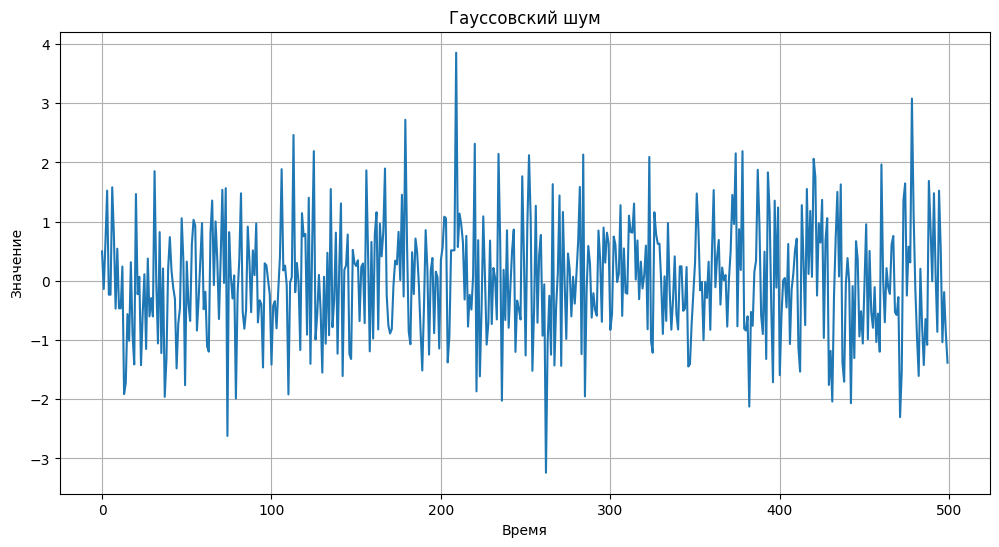

In [3]:
# Генерация гауссовского шума
np.random.seed(42)
gaussian_noise = np.random.normal(loc=0, scale=1, size=500)

# б) Построение графика
plt.figure(figsize=(12, 6))
plt.plot(gaussian_noise)
plt.title('Гауссовский шум')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

## Проведение теста Дики-Фуллера

In [4]:

result = adfuller(gaussian_noise)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -22.343814515377062
p-value: 0.0
Critical Values: {'1%': np.float64(-3.4435228622952065), '5%': np.float64(-2.867349510566146), '10%': np.float64(-2.569864247011056)}


Если p-value < 0.05, ряд стационарен.
Если p-value > 0.05, ряд нестационарен.


## Задание 2


а) Добавление тренда


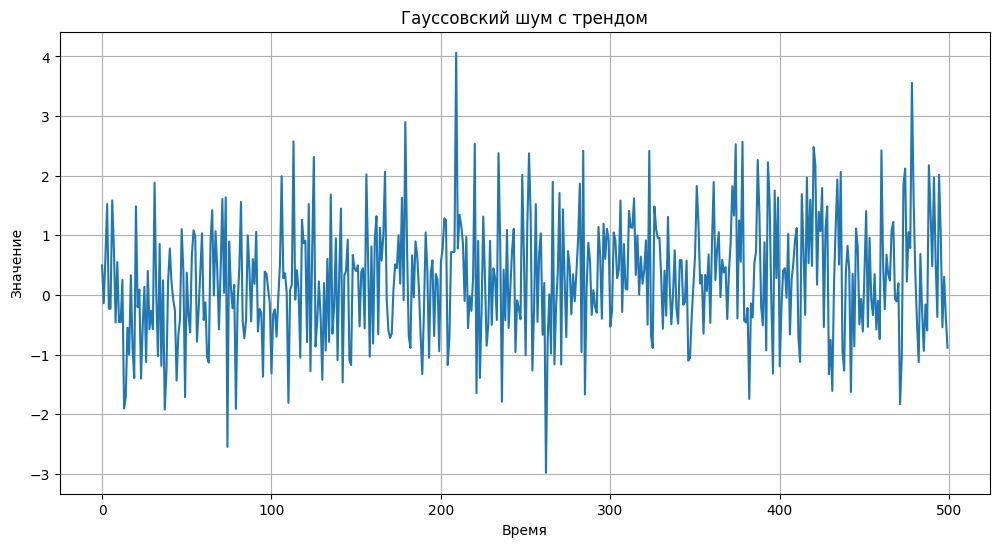

In [5]:
# Добавление тренда
trend = 0.001 * np.arange(500)
time_series_with_trend = gaussian_noise + trend

# б) Построение графика
plt.figure(figsize=(12, 6))
plt.plot(time_series_with_trend)
plt.title('Гауссовский шум с трендом')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.grid(True)
plt.show()


Проведение DF-теста


In [6]:
# Проведение теста Дики-Фуллера
result = adfuller(time_series_with_trend)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -21.730169653751204
p-value: 0.0
Critical Values: {'1%': np.float64(-3.4435228622952065), '5%': np.float64(-2.867349510566146), '10%': np.float64(-2.569864247011056)}


## Задание 3


а) Разбиение датасета passengers на 3 части и расчет среднего и дисперсии


In [9]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('passengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Разбиение на 3 части
part1 = df.iloc[:48]
part2 = df.iloc[48:96]
part3 = df.iloc[96:]

# Расчет среднего и дисперсии
mean1, var1 = part1['#Passengers'].mean(), part1['#Passengers'].var()
mean2, var2 = part2['#Passengers'].mean(), part2['#Passengers'].var()
mean3, var3 = part3['#Passengers'].mean(), part3['#Passengers'].var()

print(f'Среднее и дисперсия для части 1: {mean1}, {var1}')
print(f'Среднее и дисперсия для части 2: {mean2}, {var2}')
print(f'Среднее и дисперсия для части 3: {mean3}, {var3}')


Среднее и дисперсия для части 1: 158.375, 1094.6648936170213
Среднее и дисперсия для части 2: 269.0416666666667, 3105.9982269503544
Среднее и дисперсия для части 3: 413.4791666666667, 6161.999556737588


Если среднее и дисперсия значительно изменяются от одной части к другой, ряд нестационарен.

Таким образом, временной ряд passengers нестационарен как по среднему, так и по дисперсии.

в) Логарифмирование данных и расчет среднего и дисперсии


In [10]:
# Логарифмирование данных
df['Log_Passengers'] = np.log(df['#Passengers'])

# Разбиение на 3 части
log_part1 = df.iloc[:48]
log_part2 = df.iloc[48:96]
log_part3 = df.iloc[96:]

# Расчет среднего и дисперсии
log_mean1, log_var1 = log_part1['Log_Passengers'].mean(), log_part1['Log_Passengers'].var()
log_mean2, log_var2 = log_part2['Log_Passengers'].mean(), log_part2['Log_Passengers'].var()
log_mean3, log_var3 = log_part3['Log_Passengers'].mean(), log_part3['Log_Passengers'].var()

print(f'Среднее и дисперсия для логарифмированной части 1: {log_mean1}, {log_var1}')
print(f'Среднее и дисперсия для логарифмированной части 2: {log_mean2}, {log_var2}')
print(f'Среднее и дисперсия для логарифмированной части 3: {log_mean3}, {log_var3}')


Среднее и дисперсия для логарифмированной части 1: 5.0439107377437, 0.042901117410910884
Среднее и дисперсия для логарифмированной части 2: 5.574732792583696, 0.04051159084053209
Среднее и дисперсия для логарифмированной части 3: 6.007884345268219, 0.033399648158998464


Если среднее и дисперсия логарифмированных данных более стабильны, это может указывать на стационарность.

Среднее значение увеличивается от части к части, но не так резко, как в исходных данных. Это указывает на то, что логарифмирование уменьшило влияние тренда, но полностью не устранило его.
Дисперсия стала более стабильной и уменьшилась по сравнению с исходными данными. Это говорит о том, что логарифмирование помогло стабилизировать дисперсию


д) Проведение DF-теста на исходном датасете


In [12]:
 
result = adfuller(df['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}


p-value (0.992) значительно больше 0.05. Это означает, что мы не можем отклонить нулевую гипотезу о нестационарности ряда. Таким образом, исходный ряд нестационарен.

Проведение теста Дики-Фуллера на логарифмированных данных

In [13]:
 
result = adfuller(df['Log_Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -1.7170170891069607
p-value: 0.42236677477039125
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}


p-value (0.422) всё ещё больше 0.05. Это означает, что даже после логарифмирования ряд остаётся нестационарным, хотя значение ADF Statistic стало отрицательным, что указывает на некоторое улучшение.

## Задание 4


Проведение DF-теста с различными параметрами regression


In [16]:
# Проведение теста Дики-Фуллера с различными параметрами regression
for regression in ['c', 'ct', 'ctt', 'n']:
    result = adfuller(df['#Passengers'], regression=regression)
    print(f'Regression: {regression}')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    print()

for regression in ['c', 'ct', 'ctt', 'n']:
    result = adfuller(df['Log_Passengers'], regression=regression)
    print(f'Regression: {regression}')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    print()


Regression: c
ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}

Regression: ct
ADF Statistic: -2.1007818138446686
p-value: 0.5456589343124556
Critical Values: {'1%': np.float64(-4.030152423759672), '5%': np.float64(-3.444817634956759), '10%': np.float64(-3.1471816659080565)}

Regression: ctt
ADF Statistic: -3.23367792264355
p-value: 0.19594187397034601
Critical Values: {'1%': np.float64(-4.462541514337733), '5%': np.float64(-3.8786113536640876), '10%': np.float64(-3.5817528944014563)}

Regression: n
ADF Statistic: 2.390601734351225
p-value: 0.9971802685434735
Critical Values: {'1%': np.float64(-2.583153076923077), '5%': np.float64(-1.9432510546199364), '10%': np.float64(-1.614925969959035)}

Regression: c
ADF Statistic: -1.7170170891069607
p-value: 0.42236677477039125
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(

Интерпретация параметров regression:

'c' — константа (свободный член).
'ct' — константа и тренд.
'ctt' — константа, тренд и квадратичный тренд.
'nc' — без константы и тренда.


Учёт тренда и квадратичного тренда улучшает результаты теста, но не достаточно для достижения стационарности.
Без учёта константы и тренда ряд остаётся сильно нестационарным.
